In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

In [2]:
# Load IMDB dataset
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
word_index = imdb.get_word_index()  # Load word-to-index dictionary
reverse_word_index = {value: key for key, value in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should

In [4]:

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Creates an all-zero matrix of shape (num_samples, 10000)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  # Sets specific indices to 1 (one-hot encoding)
    return results

# Vectorize training and test data
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)


In [5]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
X_train.shape

(25000, 10000)

In [7]:

# Convert labels to NumPy arrays of type float32
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
# Define the model
model = models.Sequential()

# Input Layer + First Hidden Layer (16 neurons, ReLU activation)
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

# Second Hidden Layer (16 neurons, ReLU activation)
model.add(layers.Dense(16, activation='relu'))

# Output Layer (1 neuron, Sigmoid activation for binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from tensorflow.keras import optimizers, losses, metrics
# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),  # RMSprop optimizer with a learning rate of 0.001
    loss=losses.binary_crossentropy,  # Binary cross-entropy loss for binary classification
    metrics=[metrics.binary_accuracy]  # Track binary accuracy during training
)

In [10]:
# Split the first 10,000 samples for validation
X_val = X_train[:10000]   # First 10,000 samples for validation
partial_X_train = X_train[10000:]  # Remaining samples for training

# Split labels accordingly
y_val = y_train[:10000]   # First 10,000 labels for validation
partial_y_train = y_train[10000:]  # Remaining labels for training


In [11]:
# Train the model
history = model.fit(
    partial_X_train,  # Training data (excluding validation set)
    partial_y_train,  # Training labels
    epochs=20,  # Train for 20 epochs
    batch_size=512,  # Process 512 samples per batch
    validation_data=(X_val, y_val)  # Validate using the validation set
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - binary_accuracy: 0.6776 - loss: 0.6229 - val_binary_accuracy: 0.8577 - val_loss: 0.4145
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - binary_accuracy: 0.8844 - loss: 0.3538 - val_binary_accuracy: 0.8798 - val_loss: 0.3149
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - binary_accuracy: 0.9186 - loss: 0.2513 - val_binary_accuracy: 0.8890 - val_loss: 0.2842
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - binary_accuracy: 0.9337 - loss: 0.1953 - val_binary_accuracy: 0.8841 - val_loss: 0.2880
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - binary_accuracy: 0.9509 - loss: 0.1582 - val_binary_accuracy: 0.8873 - val_loss: 0.2799
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - binary_accuracy: 0.9610 - loss: 0.1340 - val_binary_accuracy: 0.8839 - val_loss: 0.2883
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - binary_accuracy: 0.9646 - loss: 0.1149 - val_binary_accuracy: 0.8827 - val_loss: 0.3142
Epoch 8/20
30

In [12]:
# Extract history dictionary
history_dict = history.history
# Display available keys in history
print(history_dict.keys())

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])


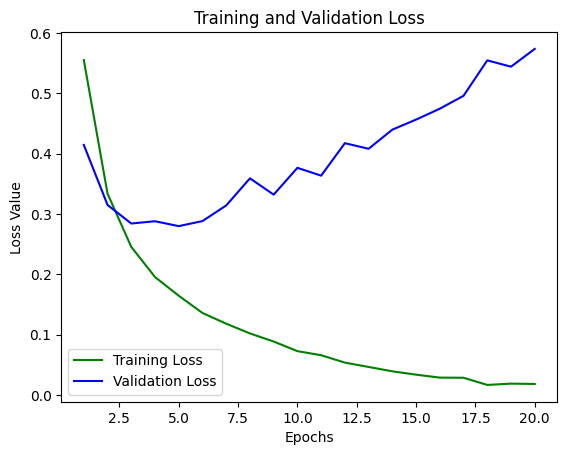

In [13]:
# Extract loss values
loss_values = history_dict['loss']  # Training loss
val_loss_values = history_dict['val_loss']  # Validation loss
# Get the number of epochs
epochs = range(1, len(loss_values) + 1)
# Plot training and validation loss
plt.plot(epochs, loss_values, 'g', label="Training Loss")  # Green line for training loss
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")  # Blue line for validation loss
# Formatting the plot
plt.title('Training and Validation Loss')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss Value')  # Y-axis label
plt.legend()  # Show legend (Training Loss, Validation Loss)
# Display the plot
plt.show()

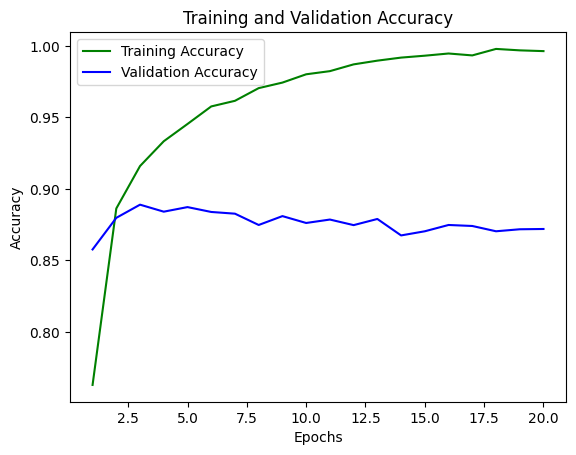

In [14]:
# Extract accuracy values
acc_values = history_dict['binary_accuracy']  # Training accuracy
val_acc_values = history_dict['val_binary_accuracy']  # Validation accuracy

# Get the number of epochs
epochs = range(1, len(acc_values) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")  # Green line for training accuracy
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")  # Blue line for validation accuracy

# Formatting the plot
plt.title('Training and Validation Accuracy')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()  # Show legend (Training Accuracy, Validation Accuracy)

# Display the plot
plt.show()

In [15]:
# Retrain the model for only 3 epochs
history = model.fit(
    partial_X_train,  # Training data (excluding validation set)
    partial_y_train,  # Training labels
    epochs=3,  # Train for only 3 epochs
    batch_size=512,  # Process 512 samples per batch
    validation_data=(X_val, y_val)  # Validate using the validation set
)

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - binary_accuracy: 0.9997 - loss: 0.0086 - val_binary_accuracy: 0.8725 - val_loss: 0.6016
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - binary_accuracy: 0.9980 - loss: 0.0108 - val_binary_accuracy: 0.8679 - val_loss: 0.6092
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - binary_accuracy: 0.9992 - loss: 0.0082 - val_binary_accuracy: 0.8679 - val_loss: 0.6296


In [16]:
# Suppress scientific notation for better readability
np.set_printoptions(suppress=True)
# Make predictions on test data
result = model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
for i, score in enumerate(result):
    label = 'Positive' if score >= 0.5 else 'Negative'
    print(f"Review {i}: {label} (Score: {score[0]:.4f})")

Streaming output truncated to the last 5000 lines.
Review 20000: Negative (Score: 0.0001)
Review 20001: Negative (Score: 0.0008)
Review 20002: Positive (Score: 0.9993)
Review 20003: Negative (Score: 0.0000)
Review 20004: Positive (Score: 1.0000)
Review 20005: Negative (Score: 0.0007)
Review 20006: Negative (Score: 0.0000)
Review 20007: Positive (Score: 1.0000)
Review 20008: Positive (Score: 0.9931)
Review 20009: Negative (Score: 0.0938)
Review 20010: Positive (Score: 0.9997)
Review 20011: Negative (Score: 0.0208)
Review 20012: Negative (Score: 0.0001)
Review 20013: Positive (Score: 1.0000)
Review 20014: Positive (Score: 0.9923)
Review 20015: Positive (Score: 1.0000)
Review 20016: Negative (Score: 0.0424)
Review 20017: Positive (Score: 1.0000)
Review 20018: Negative (Score: 0.0001)
Review 20019: Negative (Score: 0.4832)
Review 20020: Positive (Score: 0.9997)
Review 20021: Positive (Score: 1.0000)
Review 20022: Positive (Score: 0.9998)
Review 20023: Negative (Score: 0.0093)
Review 20024:

In [25]:
single_review = X_test[0].reshape(1, -1)   # reshape because predict expects batch dimension
prediction = model.predict(single_review)

if prediction >= 0.5:
    print("Positive Review")
else:
    print("Negative Review")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Positive Review


In [22]:
# Initialize an array of zeros to store predicted labels
y_pred = np.zeros(len(result))
# Convert probabilities to binary labels (0 or 1)
for i, score in enumerate(result):
    y_pred[i] = np.round(score)

print(y_pred[1])

1.0


<ipython-input-22-a6b6d6a121b3>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.round(score)


In [19]:
from sklearn import metrics
# Compute Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)

In [20]:
mae

0.14328

### **Theory:**

Binary classification is a type of classification task where the goal is to classify input data into one of two classes. The most common examples of binary classification are tasks such as spam email detection, fraud detection, or medical diagnosis, where each instance is assigned one of two possible outcomes: class 0 or class 1. The task is to learn a decision boundary that best separates the two classes.

In binary classification, a deep neural network (DNN) is often used to model the decision boundary. The DNN consists of multiple layers of neurons that learn complex patterns in the input data. The final layer of the network has a single neuron that outputs a probability, which is then mapped to a binary class label (0 or 1). This is achieved by applying an activation function like **sigmoid** to the output neuron.

### **Key Concepts of Binary Classification Using DNN**

1. **Neural Network Architecture:**
   - A typical deep neural network for binary classification includes an **input layer**, one or more **hidden layers**, and an **output layer**.
   - The **output layer** has a single neuron, as we only need to predict a single probability for classifying the input as either class 0 or class 1.
   - The **hidden layers** consist of multiple neurons and apply activation functions like **ReLU** (Rectified Linear Unit) to introduce non-linearity, allowing the network to learn complex patterns.

2. **Activation Functions:**
   - For binary classification, the **output layer** uses the **sigmoid** activation function, which squashes the output value between 0 and 1. This output represents the probability of the input belonging to class 1.
   - The **hidden layers** typically use **ReLU** or **tanh** to add non-linearity and enable the network to learn more complex patterns.

3. **Model Learning:**
   - The DNN is trained to learn the parameters (weights and biases) that minimize the loss function. For binary classification, the most commonly used loss function is **binary cross-entropy**.
   - The binary cross-entropy loss function is defined as:

      $L(y, \hat{y}) = - [ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) ]$

     where \( y \) is the actual class label, and $\hat{y}$ is the predicted probability.

4. **Gradient Descent:**
   - Like other neural networks, binary classification using DNNs relies on **gradient descent** (or its variants like Adam) to minimize the loss function. The gradients of the loss with respect to the model parameters are calculated and used to update the weights and biases during training.

5. **Output Interpretation:**
   - The output of the sigmoid function can be interpreted as the probability of the input belonging to class 1. If the output is greater than or equal to 0.5, the prediction is class 1; otherwise, it's class 0.

### **Why Use DNN for Binary Classification?**
Deep neural networks are particularly well-suited for binary classification tasks where the data has complex, high-dimensional relationships. The key advantages of using a DNN over traditional machine learning models like logistic regression are:

Non-linear Decision Boundaries: DNNs can learn non-linear decision boundaries, allowing them to classify data that is not linearly separable.

Feature Learning: The hidden layers in DNNs can automatically learn relevant features from raw data, reducing the need for manual feature engineering.

Scalability: DNNs can handle large datasets with many features and learn from large-scale, complex datasets effectively.